# The next dimension: evolving from 1D to 2D conductive heat flow

## Partial Differential Equation (PDE)
\begin{align}
\frac{\partial T}{\partial t} = \alpha_x \frac{\partial^2 T}{\partial x^2} + \alpha_y \frac{\partial^2 T}{\partial y^2}
\end{align}

## Finite Difference Method (FDM) formulation
\begin{align*}
 \frac{T^{n+1}_{i,j} - T^n_{i,j}}{\Delta t} & =  \alpha_x  \frac{T^n_{i+1,j} - 2T^n_{i,j} + T^n_{i-1,j}}{\Delta x^2} + \alpha_y  \frac{T^n_{i,j+1} - 2T^n_{i,j} + T^n_{i,j-1}}{\Delta y^2}\\
\iff  T^{n+1}_{i,j} & =  T^n_{i,j} + \frac{\alpha_x \Delta t}{\Delta x^2} \left(T^n_{i+1,j} - 2T^n_{i,j} + T^n_{i-1,j} \right) + \frac{\alpha_y \Delta t}{\Delta y^2} \left(T^n_{i,j+1} - 2T^n_{i,j} + T^n_{i,j-1}\right)
\end{align*}

## Analytical solution
\begin{equation*}
T(x,y,t) = \frac{T_\text{max}}{4t+1} \exp\left(-\frac{(x-x_c)^2}{(4 t + 1) \alpha_x} -\frac{(y-y_c)^2}{(4 t + 1)\alpha_y}\right)
\end{equation*}

### Exercises
1. Please implement and visualize the analytical solution by means of Python. The maximum of the spatial temperature distribution should be located in (x$_c$,y$_c$) = (1,1) in the domain $0 \leq x \leq 2$ and $0 \leq y \leq 2$.
2. Derive the 2D FDM formulation of the partial differential equation listed above using pen and paper. Then, please implement it in Python.
3. Compare the intial temperature distribution produced by the analytical solution at the simulation time $t=0\,s$ with that in the numerical model.
4. Run the FDM calculation with the parameters listed below for a simulation time of $t = 2\,s$ and plot the simulation results.
5. Validate the implemented FDM model by means of the analytical solution (graphical comparison) and revise it in case the basic trend of the time-dependent analytical solution diverges (e.g., at the simulation times $t = 0\,s$ and $t = 2\,s$). 
6. Which spatial discretization ($\Delta x, \Delta y$) shows a very good agreement between the numerical and analytical solutions at the simulation times $t = 0{.}1\,s, 1\,s, 2\,s$ and $4\,s$? 
7. Why do we get a significant deviation between both solutions at the simulation time $t = 10\,s$? What can we do about it?

#### Main parameters
* Thermal diffusivity $\alpha = 0{.}01\,{m^2}{s}^{-1}$.
* Time step size $\Delta t = 0{.}01\,s$. 
* Maximum initial temperature $T_{max} = 100\,K$.

#### Hints
* Calculation of the analytical solution: Execute *numpy.info(numpy.exp)*, *numpy.info(numpy.power)* in one cell.
* Graphical representation of the numerical solution: numpy matrix needs to be transposed before plotting to achieve the correct x,y assignment of the 2D data (*numpy.info(numpy.transpose)*). *numpy.zeros((x,y))* and *numpy.ones((x,y))* generate a matrix in form of ($y \times x$), which we have to address via the index order [x,y]. 

    Simple example to understand the requirement of transposition: 
```python
    > A = numpy.zeros((2,3))
    > A.shape
    (2,3)
```
    Columns and rows are transposed according to numpy syntax::
```python
    > A
    array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])
```
    numpy.transpose() transposes the matrix, so that our x,y assignment allows for the correct graphical representation:
```python
    > A.transpose()
    array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])
```
  


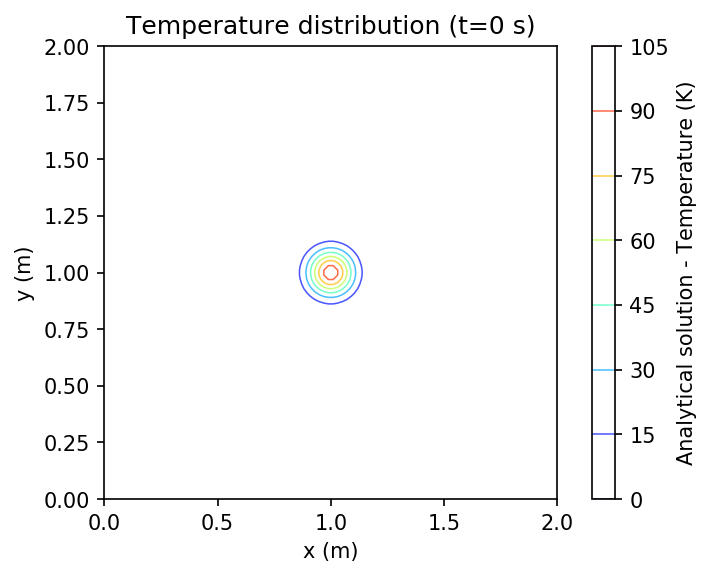

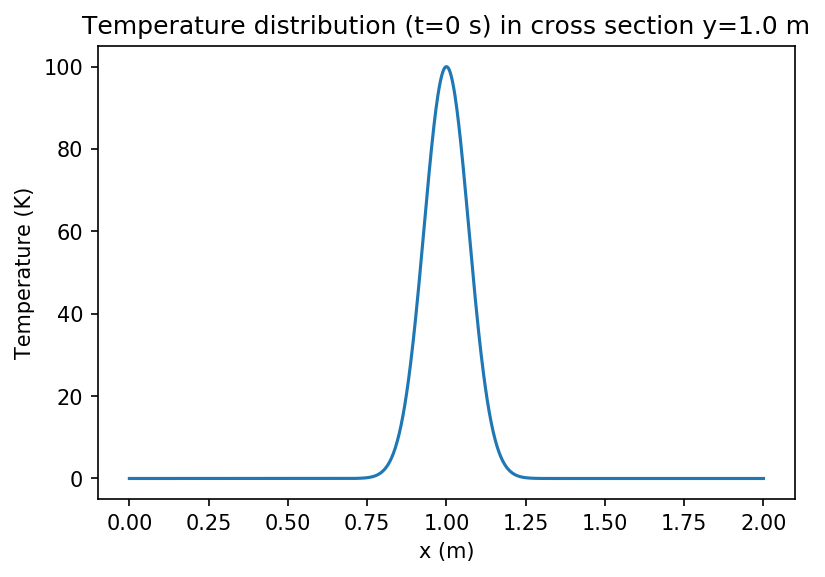

In [2]:
'''
    Analytical solution of conductive heat flow equation on finite
    2D surface
    
    Parameters:
    t  : Time (s)
    nx : Number of nodes in x direction (-)
    ny : Number of nodes in y direction (-)
    dx : Distance between nodes in x direction (m)
    dy : Distance between nodes in y direction (m)
    nt : Number of time steps (-)
    dt : Time step size (s)
    alpha_x: Thermal diffusivity in x direction (m^2/s)
    alpha_y: Thermal diffusivity in y direction (m^2/s)
    T_max : Maximum initial temperature (K)
'''

# Load required libraries
import numpy
from matplotlib import pyplot, cm # cm: colormap
%matplotlib inline

# Model parametrization
T_max = 100
alpha_x = 0.01
alpha_y = 0.01
t = 0

# Analytical solutions defined as function
# note: substract 1 from x_ and y_ coordinates to shift maximum to (x,y) 
# = (1,1)
def analytical_2D(x_,y_,t, T_max):
    return T_max/(4*t+1)*numpy.exp(-(numpy.power(x_-1,2))/(4*t+1)/alpha_x - \
                               (numpy.power(y_-1,2))/(4*t+1)/alpha_y)


# Generate x,y matrix for visualization
x = numpy.linspace(0, 2, 100)
y = numpy.linspace(0, 2, 100)

# Graphical representation of 2D plan view
fig = pyplot.figure(dpi=150)
ax = fig.gca(aspect=1) # Aspect ratio of 1:1 (no distortion)
X, Y = numpy.meshgrid(x, y) # Generate grid (meshgrid) for visualization 
# Contour plot of results in 2D
anx = ax.contour(X, Y, analytical_2D(X,Y,t, T_max), cmap=cm.jet, \
    linewidths=0.75, alpha=0.7, antialiased=True, linestyles='solid');
# Legend in form of coloured bar
cbanx = fig.colorbar(anx);
cbanx.set_label('Analytical solution - Temperature (K)')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
pyplot.title('Temperature distribution (t='+str(t)+' s)');

# Graphical representation of cross section through y = 1 m 
x_ = numpy.linspace(0,2,1000) # Resolution: 1000 points(!)
fig2 = pyplot.figure(dpi=150)
aqp = pyplot.plot(x_,analytical_2D(x_,1.,t,T_max));
pyplot.title('Temperature distribution (t='+str(t) + \
             ' s) in cross section y=1.0 m');
pyplot.xlabel('x (m)');
pyplot.ylabel('Temperature (K)');


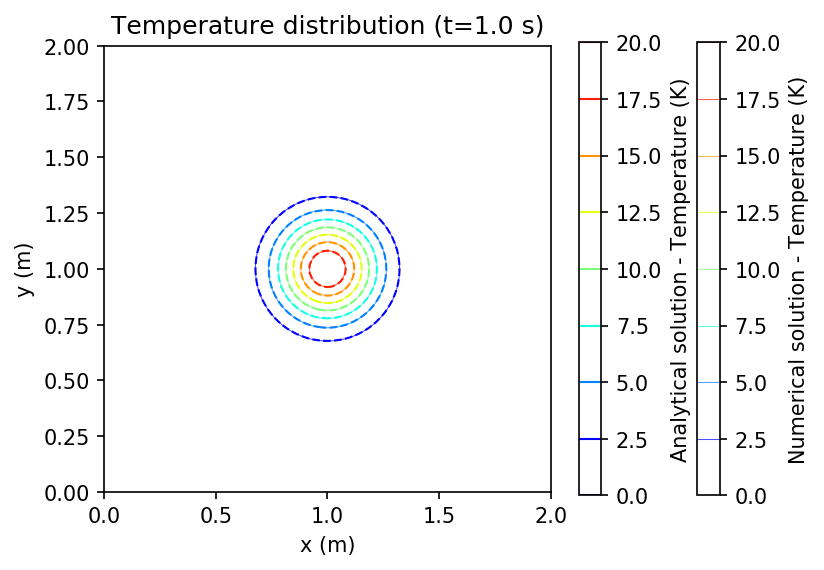

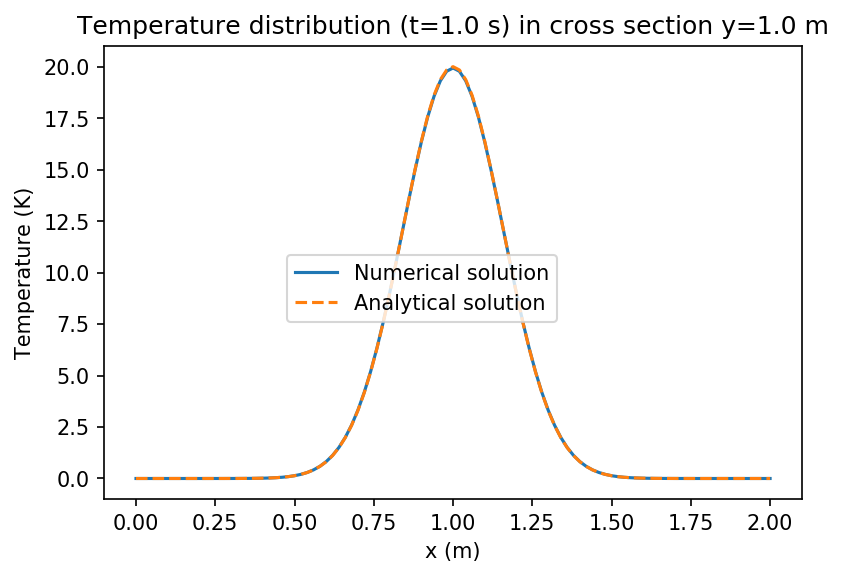

In [5]:
'''
    Numerical solution of conductive heat transport equation 
    for finite 2D surface
    
    Parameters:
    lx : model length in x direction (m)
    ly : model length in y direction (m)
    nx : number of nodes in x direction (-)
    ny : number of nodes in y direction (-)
    dx : distance between nodes in x direction (m)
    dy : distance between nodes in y direction (m)
    nt : number of time steps (-)
    dt : time step size (s)
    alpha_x: thermal diffusivity in x direction (m^2/s)
    alpha_y: thermal diffusivity in y direction (m^2/s)
    T_max : maximum initial temperature (K)
    t = nt * dt : time calculation for analytical solution (s)
    T : numpy matrix (array) with nx x ny elements of value 0
        results for time step n+1 (K)
    Tn : numpy matrix with results for time step n (K)
'''

# Load required modules
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

# Model parametrization
lx = 2             # model length in x direction (m)
ly = 2             # model length in y direction (m)
nx = 101           # number of nodes in x direction (-)
ny = 101           # number of nodes in y direction (-)
dx = lx / (nx - 1) # distance between nodes in x direction (m)
dy = ly / (ny - 1) # distance between nodes in y direction (m)
nt = 100           # number of time steps (-)
dt = .01           # time step size (s)
alpha_x = 0.01     # thermal diffusivity in x direction (m^2/s)
alpha_y = 0.01     # thermal diffusivity in y direction (m^2/s)
T_max = 100        # maximum initial temperature (K)
t = nt * dt        # Final time calculation for analytical solution

# Initialization of matrices for our calculation
T = numpy.zeros((nx,ny))   # numpy matrix (array) wth nx x ny elements
                                # of value zero
                                # results for time step n+1 
Tn = numpy.zeros((nx,ny)) # numpy matrix with results for time step n

# Generate initial conditions based on analytical solution at t = 0 s
for i in range(0, nx): # iterate over all i nodes [0,nx)
    for j in range(0, ny): # iterate ober all j nodes [0,ny)
        T[i,j] = analytical_2D(i*dx,j*dy,0., T_max)

# FDM formulation of 2D PDE
for n in range(nt):  # Iteration over number of time steps nt
    Tn = T.copy()    # Copy old temperature into Tn matrix
    for i in range(1, nx - 1): # iterate over i nodes (0,nx)
        for j in range(1, ny - 1): # iterate over j nodes (0,ny)
            T[i,j] = Tn[i,j] + \
            alpha_x * dt / dx**2 * (Tn[i+1,j] - 2 * Tn[i,j] + Tn[i-1,j]) + \
            alpha_y * dt / dy**2 * (Tn[i,j+1] - 2 * Tn[i,j] + Tn[i,j-1])
        
# Graphical representation of results
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

# Contour plot of 2D results
fig = pyplot.figure(dpi=150)
ax = fig.gca(aspect=1)
X, Y = numpy.meshgrid(x, y)
nux = ax.contour(X, Y, numpy.transpose(T), cmap=cm.jet,
        linewidths=0.5, alpha=0.7, antialiased=True, linestyles='solid');
cbnux = fig.colorbar(nux);
cbnux.set_label('Numerical solution - Temperature (K)')
anx = ax.contour(X, Y, analytical_2D(X,Y,t, T_max), cmap=cm.jet,
        linewidths=1, alpha=1, antialiased=True, linestyles='dashed' );
cbanx = fig.colorbar(anx);
cbanx.set_label('Analytical solution - Temperature (K)')
pyplot.title('Temperature distribution (t=' + str(t) + ' s)');
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')

# Graphical representation of cross section through y = 1 m
xx = numpy.linspace(0,2,nx)
fig2 = pyplot.figure(dpi=150)
pyplot.plot(xx,T[:,int((ny-1)/2)], label='Numerical solution');
pyplot.plot(xx,analytical_2D(xx,1,t,T_max), label='Analytical solution', \
            linestyle='--');
pyplot.title('Temperature distribution (t=' + str(t) + \
             ' s) in cross section y=1.0 m');
pyplot.xlabel('x (m)');
pyplot.ylabel('Temperature (K)');
fig2.legend(loc='center');

In [3]:
numpy.info(numpy.power)

power(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

First array elements raised to powers from second array, element-wise.

Raise each base in `x1` to the positionally-corresponding power in
`x2`.  `x1` and `x2` must be broadcastable to the same shape. Note that an
integer type raised to a negative integer power will raise a ValueError.

Parameters
----------
x1 : array_like
    The bases.
x2 : array_like
    The exponents.
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or `None`,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    Values of True indicate to calculate the ufunc at that position, values
    of False indicate to leave the value in the output